## Redes Convolucionales para reconocimiento de imágenes

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Implementación de Redes Convolucionales en Keras" se propuso una implementación a través de *"Keras"* de una red convolucional para una base de datos que contiene imágenes de dígitos manuscritos. En este *notebook* se pretende evaluar el uso de *keras* al aplicar una red convolucional sobre un conjunto de imágenes más complejo, "Fashion MNIST". 

### Instrucciones generales

1. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

2. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

### Criterios a evaluar

Los criterios que se evaluarán son:

Preparación de las variables: Se adaptan los datos apropiadamente para el uso de las funciones de `keras` y realiza la partición de la muestra en entrenamiento, validación y test. [15 puntos]

Estimación de un modelo utilizando redes neuronales convolucionales: Se estima el modelo usando una CNN, se establecen los parámetros y estructuras apropiadamente, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [45 puntos]

Calidad de la predicción: La arquitectura implementada posee un buen desempeño entre el nivel de precisión obtenido y el tiempo de ejecución. **Nota: Se considera un nivel de precisión del 91% como buen desempeño para este laboratorio**. Asegúrese de no implementar una red excesivamente profunda probándola en los servidores que ofrece la plataforma Coursera, pues con estos realizamos la calificaciónde su solución. [40 puntos]


#### Problema

Fashion-MNIST es una base de datos de imágenes de artículos de la tienda de ropa Zalando, que consta de un set de entrenamiento de 60000 muestras y un set de test de 10000 muestras. Cada dato es una imagen en escala de grises de una prenda de vestir, asociada con una etiqueta de 10 clases.

Ustedes deben proponer el algoritmo para hacer la clasificación de las prendas con una red neuronal convolucional.

### Librerías a importar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras import initializers
from tensorflow.keras.utils import set_random_seed
import tensorflow as tf

# Set random seed for reproducibility
set_random_seed(812)

import time 

In [ ]:
# Función para graficar la historia del entrenamiento
import matplotlib.pyplot as plt

def plot_history(history):
    """
    Plots training and validation loss and accuracy.

    Parameters:
      history: A dictionary containing keys:
          'loss', 'val_loss', 'accuracy', and 'val_accuracy'.
          (If a Keras History object is passed, its `.history` attribute will be used.)
    """
    hist = history.history if hasattr(history, 'history') else history

    # Final metrics
    print(f"Train Loss final: {hist['loss'][-1]:.3f}, "
          f"Train Accuracy final: {hist['accuracy'][-1]:.3f}")
    print(f"Validation Loss final: {hist['val_loss'][-1]:.3f}, "
          f"Validation Accuracy final: {hist['val_accuracy'][-1]:.3f}")

    plt.figure(figsize=(12, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(hist['loss'], label='Training Loss', marker='o')
    plt.plot(hist['val_loss'], label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs. Validation Loss')
    plt.legend()
    plt.grid(True)

    # AUC plot
    plt.subplot(1, 2, 2)
    plt.plot(hist['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(hist['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs. Validation Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

### 1. Preparación de las variables (15 puntos)

Adapte los datos apropiadamente para el uso de las funciones de `keras` y realiza la partición de la muestra en entrenamiento, validación y test.

In [4]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
print('Dimensiones de los datos de Training: ', x_train.shape, y_train.shape)
print('Dimensiones de los datos de Testing: ', x_test.shape, y_test.shape)

Dimensiones de los datos de Training:  (60000, 28, 28) (60000,)
Dimensiones de los datos de Testing:  (10000, 28, 28) (10000,)


In [6]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Número total de clases: ', nClasses)
print('Clases/labels: ', classes)

Número total de clases:  10
Clases/labels:  [0 1 2 3 4 5 6 7 8 9]


In [7]:
counts = np.bincount(y_train)
print(counts)

[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


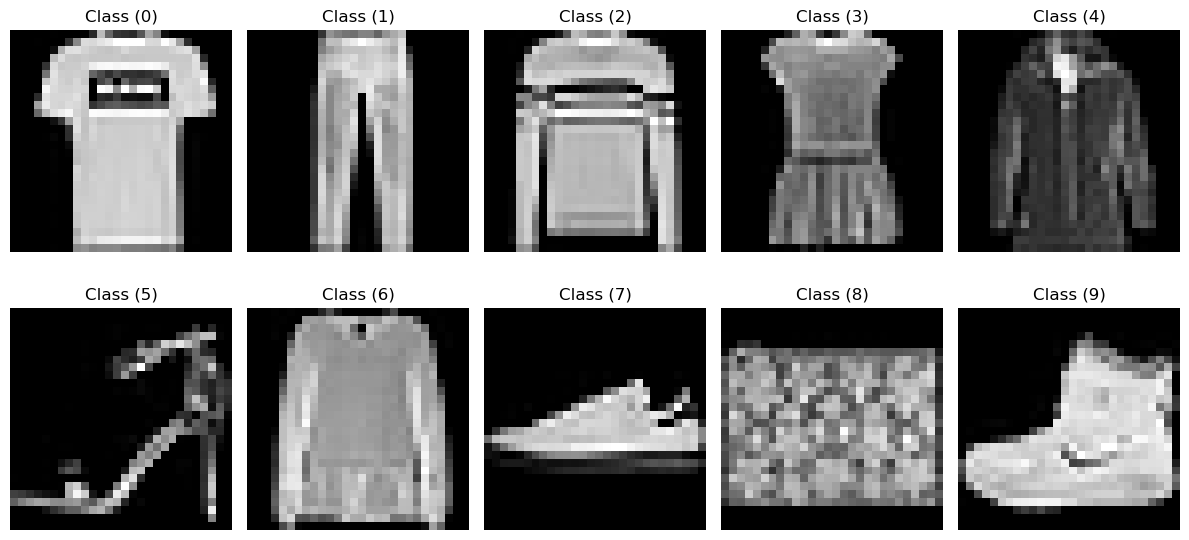

In [8]:
plt.figure(figsize=(12, 6))

for label in np.unique(y_train):
    # Get index of first occurrence of this label
    idx = np.where(y_train == label)[0][0]
    
    plt.subplot(2, 5, label + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"Class ({label})")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [9]:
print(x_train.dtype)

uint8


In [10]:
train_X = x_train.astype('float32')
test_X = x_test.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [11]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, y_train, test_size=0.2, random_state=42)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [12]:
image_rows = train_X.shape[1]
image_cols = train_X.shape[2]
train_X = train_X.reshape(-1,image_rows,image_cols, 1)
valid_X = valid_X.reshape(-1,image_rows,image_cols, 1)
test_X = test_X.reshape(-1,image_rows,image_cols, 1)
train_X.shape, test_X.shape

((48000, 28, 28, 1), (10000, 28, 28, 1))

#### Procedimiento

Se cargan los datos correspondientes de entrenamiento y prueba al conjunto fashion_minst de keras. El conjunto de entrenamiento cuenta con 60000 observaciones, y el de test con 10000. Correspondientes a imagenes de 28x28 pixeles de prendas de vestir y accesorios que pertenecen a 10 clases. Estas clases se encuentran balanceadas en el conjunto de entrenamiento (6000 c/u)

Se verifica el tipo de datos de los arreglos, y se transforman a tipo float. Luego se normalizan para asegurar el correcto funcionamiento de la red neuronal. Posteriormente se subdividen los datos de entrenamiento para obtener una muestra de validación y poder observar el comportamiento de la red neuronal durante el entrenamiento en dicho conjunto. 

Luego es necesario ajustar las dimensiones de todas las muestras de  datos de un arreglo de 3 dimensiones a uno de 4 dimensiones en el cual se incluyen las imagenes, sus dimensiones y el número de canales, en este caso 1, puesto que se trata de imagenes en escala de grises. 


### 2. Estimación de un modelo utilizando redes neuronales convolucionales (45 puntos)

Estimen un modelo predictivo usando la muestra de entrenamiento y establezcan apropiadamente cada uno de los parámetros de la red.

In [13]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
# Modelo Base
fashion_model = Sequential()
fashion_model.add(Input(shape=(image_rows, image_cols, 1)))
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
fashion_model.add(MaxPooling2D((2, 2), padding='same'))
fashion_model.add(Dropout(0.2))
fashion_model.add(Flatten())
fashion_model.add(Dense(64, activation='relu'))
fashion_model.add(Dense(nClasses, activation='softmax'))

In [14]:
from tensorflow.keras.optimizers import Adam

fashion_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

fashion_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,442 (1.54 MB)

 Trainable params: 402,442 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
batch_size = 128
epochs = 25

start = time.time()
fashion_train = fashion_model.fit(
    train_X, train_label,
    batch_size = batch_size,
    epochs = epochs,
    verbose=1,
    validation_data=(valid_X, valid_label)
)
end = time.time()
fashion_time = end - start
print(f"Tiempo de entrenamiento: {fashion_time:.2f} segundos")
# Evaluación del modelo


Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8858 - loss: 0.3147 - val_accuracy: 0.8852 - val_loss: 0.3200
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9014 - loss: 0.2665 - val_accuracy: 0.8909 - val_loss: 0.3065
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9096 - loss: 0.2411 - val_accuracy: 0.8898 - val_loss: 0.3052
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9153 - loss: 0.2221 - val_accuracy: 0.8904 - val_loss: 0.3214
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9229 - loss: 0.2074 - val_accuracy: 0.8897 - val_loss: 0.3271
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9260 - loss: 0.1939 - val_accuracy: 0.8982 - val_loss: 0.3293
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9307 - loss: 0.1857 - val_accuracy: 0.8941 - val_loss: 0.3387
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9324 - loss: 0.1783 - val_accu

Train Loss final: 0.121, Train Accuracy final: 0.956
Validation Loss final: 0.512, Validation Accuracy final: 0.897


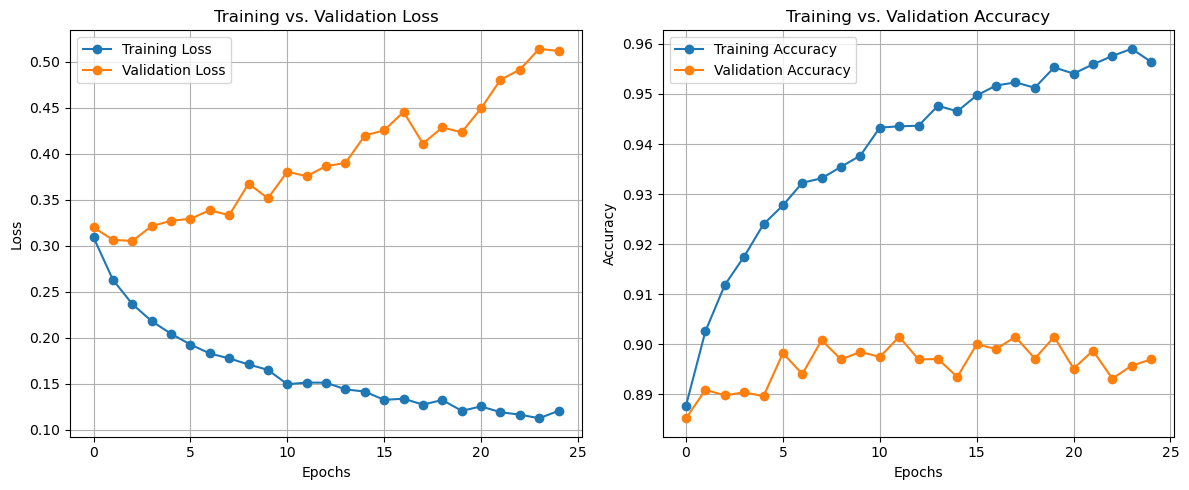

In [17]:
plot_history(fashion_train)

#### Segundo Modelo

In [ ]:
# Modelo 1
from tensorflow.keras.layers import BatchNormalization

fashion_model1 = Sequential()
fashion_model1.add(Input(shape=(image_rows, image_cols, 1)))

# Primer bloque convolucional
fashion_model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
fashion_model1.add(BatchNormalization())
fashion_model1.add(MaxPooling2D((2, 2), padding='same'))
fashion_model1.add(Dropout(0.2))

# Segundo bloque convolucional
fashion_model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
fashion_model1.add(BatchNormalization())
fashion_model1.add(MaxPooling2D((2, 2), padding='same'))
fashion_model1.add(Dropout(0.3))

# Tercer bloque convolucional
fashion_model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
fashion_model1.add(BatchNormalization())
fashion_model1.add(MaxPooling2D((2, 2), padding='same'))
fashion_model1.add(Dropout(0.4))

# Capas densas
fashion_model1.add(Flatten())
fashion_model1.add(Dense(128, activation='relu'))
fashion_model1.add(Dropout(0.5))
fashion_model1.add(Dense(nClasses, activation='softmax'))

In [19]:
from tensorflow.keras.optimizers import Adam

fashion_model1.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001), # Disminuimos tasa aprendizaje
    metrics=['accuracy']
)

fashion_model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,130 (1.36 MB)

 Trainable params: 356,682 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

In [21]:
batch_size = 128
epochs = 25

start = time.time()
fashion_train1 = fashion_model1.fit(
    train_X, train_label,
    batch_size = batch_size,
    epochs = epochs,
    verbose=1,
    validation_data=(valid_X, valid_label),
    callbacks=[early_stop, reduce_lr]
)
end = time.time()
fashion_time1 = end - start
print(f"Tiempo de entrenamiento: {fashion_time1:.2f} segundos")

Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.6276 - loss: 1.1098 - val_accuracy: 0.5767 - val_loss: 1.5527 - learning_rate: 0.0010
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.8121 - loss: 0.5114 - val_accuracy: 0.8653 - val_loss: 0.3580 - learning_rate: 0.0010
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.8402 - loss: 0.4290 - val_accuracy: 0.8778 - val_loss: 0.3299 - learning_rate: 0.0010
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.8586 - loss: 0.3860 - val_accuracy: 0.8904 - val_loss: 0.2914 - learning_rate: 0.0010
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.8679 - loss: 0.3600 - val_accuracy: 0.8934 - val_loss: 0.2888 - learning_rate: 0.0010
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.8771 - loss: 0.3405 - val_accuracy: 0.8892 - val_loss: 0.2959 - learning_rate: 0.0010
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.8813 - l

Train Loss final: 0.203, Train Accuracy final: 0.926
Validation Loss final: 0.203, Validation Accuracy final: 0.927


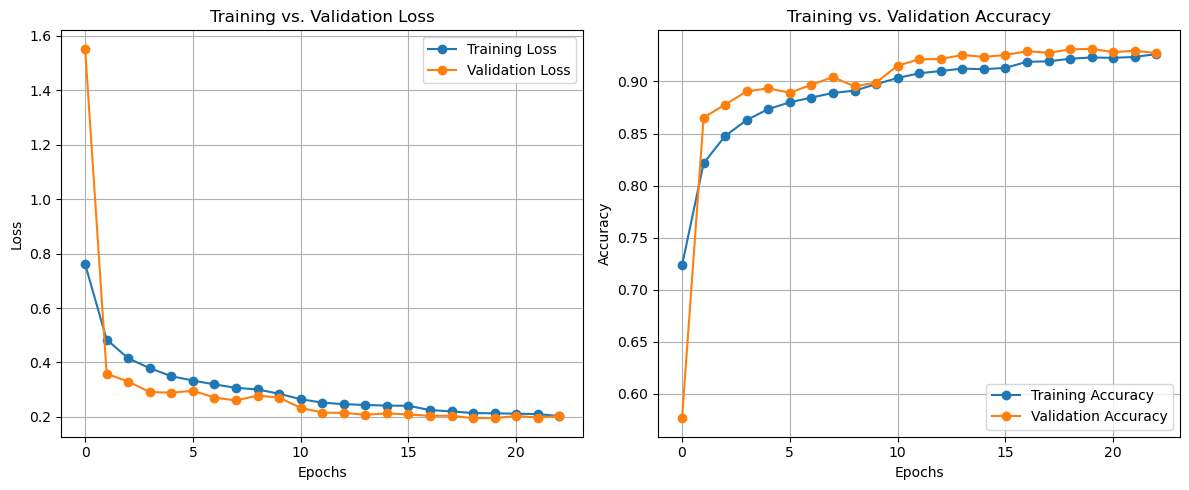

In [22]:
plot_history(fashion_train1)

In [ ]:
# Saving the model
fashion_model1.save("fashion_model1.keras")

# Para cargar el modelo guardado, descomentar la siguiente línea
#fashion_model1 = load_model("fashion_model1.keras")

In [ ]:
import pickle

# Save training history
with open("fashion_train1.pkl", "wb") as f:
    pickle.dump(fashion_train1.history, f)

# Para cargar training history
#with open("fashion_train1.pkl", "rb") as f:
    #loaded_history = pickle.load(f)    

##### Calibración Modelo 

In [30]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))

    # Calibrar el # de bloques de Convolucion y tamaño de filtros
    for i in range(hp.Int("conv_blocks", 1, 3)):
        filters = hp.Int(f"filters_{i}", min_value=32, max_value=128, step=32)
        model.add(Conv2D(filters=filters, kernel_size=3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=2, padding='same'))
        model.add(Dropout(rate=hp.Float(f"dropout_{i}", 0.2, 0.5, step=0.1)))

    model.add(Flatten())

    # Calibrar el # de capas densas y unidades y dropout
    model.add(Dense(units=hp.Int("dense_units", 64, 256, step=64), activation='relu'))
    model.add(Dropout(rate=hp.Float("dense_dropout", 0.2, 0.5, step=0.1)))
    model.add(Dense(10, activation='softmax'))

    # Calibrar la tasa de aprendizaje
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice("lr", [1e-2, 1e-3, 1e-4])),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [31]:
tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=10,
    factor=3,
    directory="tuner_dir",
    project_name="fashion_tune"
)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

In [33]:
start = time.time()
tuner.search(
    train_X, train_label,
    validation_data=(valid_X, valid_label),
    epochs=15,
    callbacks=[early_stop],
    verbose=1
)
end = time.time()
tuner_time = end - start
print(f"Tiempo de entrenamiento: {tuner_time:.2f} segundos")


Trial 30 Complete [00h 07m 14s]
val_accuracy: 0.8801666498184204

Best val_accuracy So Far: 0.9193333387374878
Total elapsed time: 01h 24m 59s
Tiempo de entrenamiento: 5098.67 segundos


In [35]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Mejores Hiperparametros:")
for k, v in best_hps.values.items():
    print(f"{k}: {v}")

Mejores Hiperparametros:
conv_blocks: 1
filters_0: 64
dropout_0: 0.2
dense_units: 128
dense_dropout: 0.4
lr: 0.0001
filters_1: 64
dropout_1: 0.30000000000000004
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
filters_2: 96
dropout_2: 0.2


##### Esta vez:

Mejores Hiperparametros:
conv_blocks: 1
filters_0: 64
dropout_0: 0.2
dense_units: 128
dense_dropout: 0.4
lr: 0.0001
filters_1: 64
dropout_1: 0.30000000000000004
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
filters_2: 96
dropout_2: 0.2

In [36]:
best_model.save("best_fashion_model.keras")

##### Adicionamos epocas al entrenamiento del mejor modelo obtenido durante la calibración

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

In [39]:
start
bm_add_history = best_model.fit(
    train_X, train_label,
    validation_data=(valid_X, valid_label),
    epochs=25,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)
end = time.time()
bm_add_time = end - start
print(f"Tiempo adicional de entrenamiento: {bm_add_time:.2f} segundos")

Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.9546 - loss: 0.1223 - val_accuracy: 0.9259 - val_loss: 0.2222 - learning_rate: 1.0000e-04
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.9562 - loss: 0.1181 - val_accuracy: 0.9252 - val_loss: 0.2243 - learning_rate: 1.0000e-04
Epoch 3/25
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9585 - loss: 0.1116
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9585 - loss: 0.1116 - val_accuracy: 0.9257 - val_loss: 0.2254 - learning_rate: 1.0000e-04
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9628 - loss: 0.1018 - val_accuracy: 0.9274 - val_loss: 0.2220 - learning_rate: 5.0000e-05
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.9667 - loss: 0.0946 - val_accuracy: 0.9281 - val_loss: 0.2244 - learning_rate: 5.0000e-05
Epoch 6/25
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - acc

Train Loss final: 0.087, Train Accuracy final: 0.969
Validation Loss final: 0.223, Validation Accuracy final: 0.928


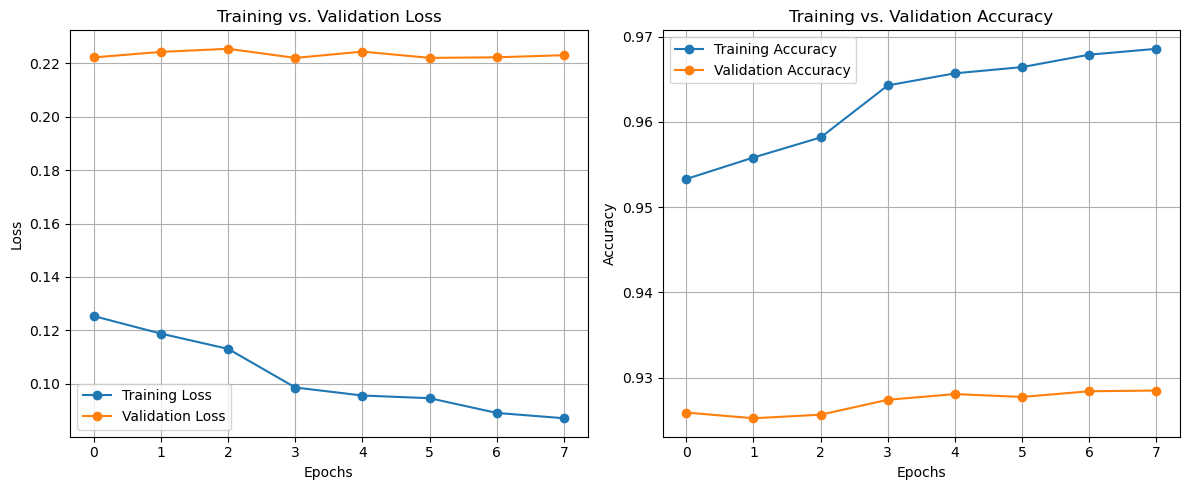

In [40]:
plot_history(bm_add_history)

In [42]:
print("Epochs del  tuner:", len(tuner.oracle.get_best_trials(1)[0].metrics.get_history('val_accuracy')))
print("Epochs adicionales:", len(bm_add_history.history['val_accuracy']))

Epochs del  tuner: 1
Epochs adicionales: 8


#### Entrenando el mejor modelo desde cero 

In [60]:
fashion_model_t = build_model(best_hps)

In [61]:
fashion_model_t.compile(
    optimizer=Adam(learning_rate=best_hps.get('lr')),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [62]:
fashion_model_t.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,607,946 (6.13 MB)

 Trainable params: 1,607,818 (6.13 MB)

 Non-trainable params: 128 (512.00 B)

In [63]:
start = time.time()
fashion_model_t_train = fashion_model_t.fit(
    train_X, train_label,
    validation_data=(valid_X, valid_label),
    epochs=25,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)
end = time.time()
fashion_model_t_time = end - start
print(f"Tiempo de entrenamiento: {fashion_model_t_time:.2f} segundos")

Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.7252 - loss: 0.7992 - val_accuracy: 0.8615 - val_loss: 0.8570 - learning_rate: 1.0000e-04
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8612 - loss: 0.3876 - val_accuracy: 0.8937 - val_loss: 0.3008 - learning_rate: 1.0000e-04
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.8812 - loss: 0.3319 - val_accuracy: 0.8991 - val_loss: 0.2744 - learning_rate: 1.0000e-04
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.8952 - loss: 0.2908 - val_accuracy: 0.9046 - val_loss: 0.2576 - learning_rate: 1.0000e-04
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.9026 - loss: 0.2694 - val_accuracy: 0.9067 - val_loss: 0.2520 - learning_rate: 1.0000e-04
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.9099 - loss: 0.2475 - val_accuracy: 0.9101 - val_loss: 0.2472 - learning_rate: 1.0000e-04
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/ste

Train Loss final: 0.102, Train Accuracy final: 0.964
Validation Loss final: 0.215, Validation Accuracy final: 0.926


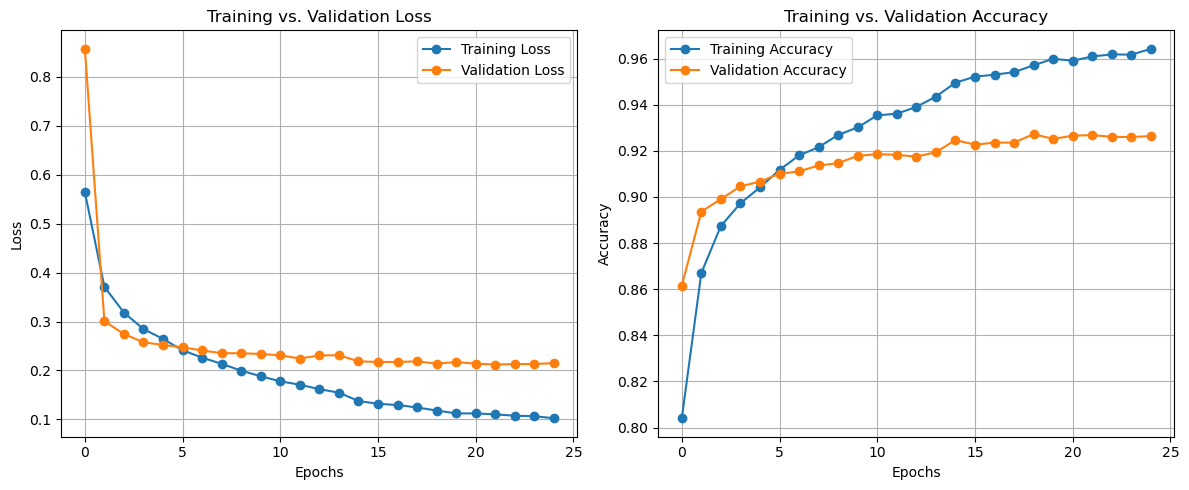

In [64]:
plot_history(fashion_model_t_train)

In [78]:
modelos = ['Base 1C_MxP_Dp_F_D_D', 'Mod 3C_BNorm_MxP_Dp_F_D_D+ES+Rlr', 'Mod_calibrado(tuner)', 'Mod_Entrenado(mejores parametros tuner)']
historias = [fashion_train, fashion_train1,  bm_add_history, fashion_model_t_train]
tiempos = [fashion_time/60, fashion_time1/60,  bm_add_time/60, fashion_model_t_time/60]
Accuracy_train =[]
Accuracy_val = []
loss_train = []
loss_val = []

for i in historias:
    Accuracy_train.append(i.history['accuracy'][-1])
    loss_train.append(i.history['loss'][-1])
    Accuracy_val.append(i.history['val_accuracy'][-1])
    loss_val.append(i.history['val_loss'][-1])

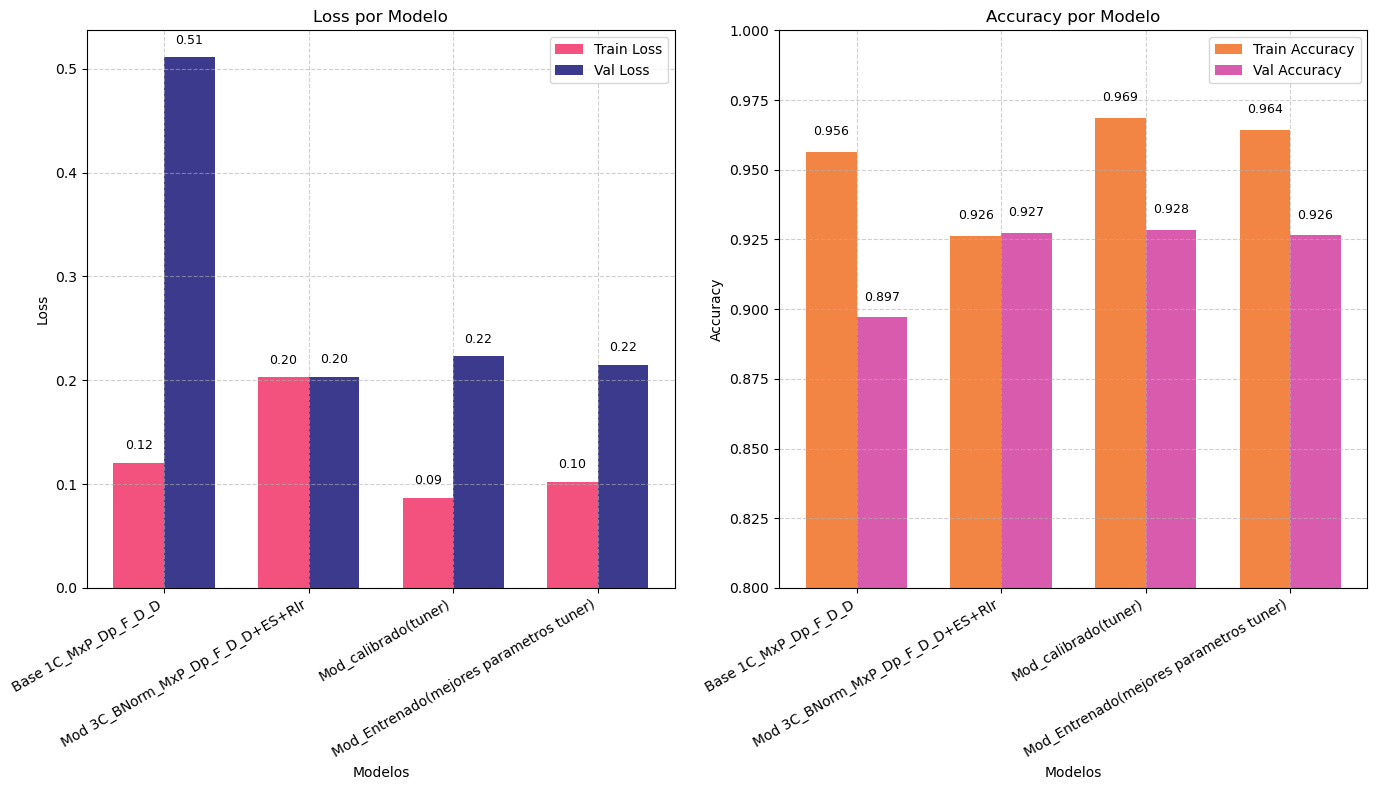

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))
x = np.arange(len(modelos))
width = 0.35

# --- Loss ---
bars1 = axs[0].bar(x - width/2, loss_train, width, label='Train Loss', color='#F2527D')
bars2 = axs[0].bar(x + width/2, loss_val, width, label='Val Loss', color='#3C3A8C')
axs[0].set_title('Loss por Modelo')
axs[0].set_xlabel('Modelos')
axs[0].set_ylabel('Loss')
axs[0].set_xticks(x)
axs[0].set_xticklabels(modelos, rotation=30, ha='right')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.6)

# Add value labels (without affecting legend)
for bar in bars1:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# --- Accuracy ---
bars3 = axs[1].bar(x - width/2, Accuracy_train, width, label='Train Accuracy', color='#F28444')
bars4 = axs[1].bar(x + width/2, Accuracy_val, width, label='Val Accuracy', color='#D95BAD')
axs[1].set_title('Accuracy por Modelo')
axs[1].set_xlabel('Modelos')
axs[1].set_ylabel('Accuracy')
axs[1].set_xticks(x)
axs[1].set_xticklabels(modelos, rotation=30, ha='right')
axs[1].set_ylim(0.8, 1.0)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.6)

# Add value labels (without affecting legend)
for bar in bars3:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.3f}', ha='center', va='bottom', fontsize=9)
for bar in bars4:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

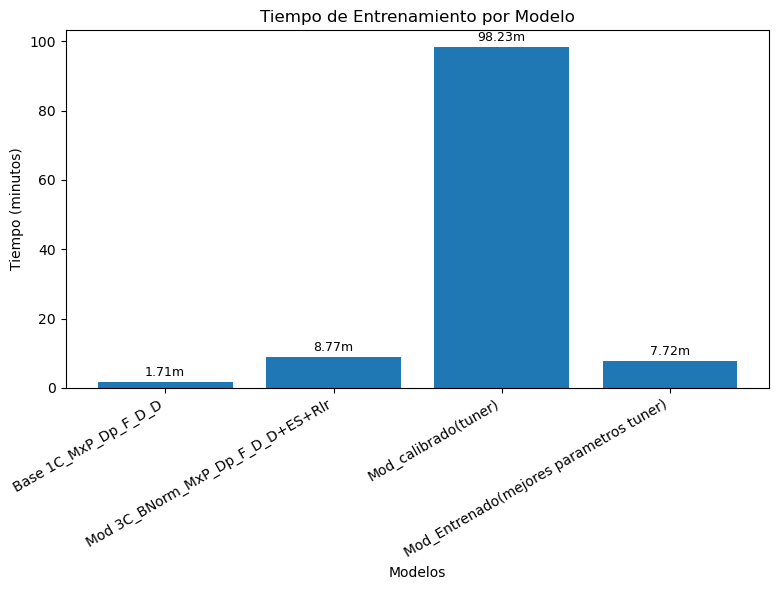

In [82]:
# Plot tiempos de entrenamiento
x = np.arange(len(modelos))

plt.figure(figsize=(8,6))
bars = plt.bar(x, tiempos)
plt.title('Tiempo de Entrenamiento por Modelo')
plt.xlabel('Modelos')
plt.ylabel('Tiempo (minutos)')
plt.xticks(x, modelos, rotation=30, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1,
             f"{height:.2f}m", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

##### Procedimiento Análisis y Conclusiones

Para el desarrollo de este punto se siguieron estos pasos:

1. Se entrenó un primer modelo con los mismos parámetros del modelo implementado en el laboratorio formativo de la semana, a excepción del tamaño del lote que en nuestro caso fue de 128. Los resultados de este modelo no fueron satisfactorios, particularmente la pérdida en validación resultó casi cinco veces más alta que la del entrenamiento:
![alt text](image.png)

2. Luego se entrenó un segundo modelo, con una arquitectura que sabíamos que tenía un buen desempeño en el conjunto de datos lenguaje de señas ASL (American Sign Language), el cual tiene  24 clases también en escala de grises. Esta arquitectura incluye dos bloques de convolución adicionales, normalización de lotes, dropouts, aplanamiento y dos capas densas completamente conectadas con sus respectivos dropouts. Adicionalmente,  se incorporaron dos call backs durante el entrenamiento: uno para incluir early stopping, y otro,  para reducir la rata de aprendizaje "on plateau". Este conjunto de arquitectura/entrenamiento mejoraron considerablemente el desempeño de la red. Particularmente en la estabilidad y sobreajuste de la misma:
![alt text](image-1.png)

3. En un tercer ejercicio decidimos calibrar el modelo para ver si podíamos encontrar uno que se ajustara mejor a los datos de fashion_minst utilizando keras_tuner. Queríamos encontrar el número de bloques de convolución y de filtros para los mismos, el número de neuronas en la penúltima capa densa, las tasas de dropout, y de aprendizaje óptimos. Asi que definimos un espacio de búsqueda alrededor de los parámetros del segundo modelo. En esta oportunidad utilizamos el algoritmo de búsqueda **Hyperband** (En el proyecto de la competencia probamos gridsearch y randomsearch), el cual comineza la búsqueda combinando muchos hiperparámetros, los entrena por pocas epocas descartando los que se desempeñan peor de manera temprana, para dedicar mas épocas a los que presentan mejor desempeño.  El resultado obtenido por el mejor modelo fue:

- Best val_accuracy So Far: 0.9193333387374878

En ese punto continuamos el entrenamiento, incluyendo los mismos call backs definidos anteriormente y obtuvimos los siguientes resultados:
![alt text](image-2.png)

Como no es posible apreciar toda la historia del entrenamiento, (o no supimos como hacerlo), decidimos construir un último modelo con los mejores parámetros obtenidos de esta calibración: Un bloque de convolución con 64 filtros, normalización de lotes, maxpooling, dropout de 0.2, aplanamiento, una capa densa de 128 neuronas con un dropout de 0.4, finalmente una capa densa de 10 neuronas.  Así podremos observar la estabilidad del modelo en su historia y comparar la magnitud del sobreajuste con los modelos anteriores: 
![alt text](image-3.png)

Al final comparamos los resultados y concluimos: Con la calibración efectivamente se obtienen mejores resultados en el conjunto de entrenamiento (pérdida y accuracy), sin embargo los resultados en validación son practicamente los mismos que los obtenidos en el modelo sin calibrar. Esto se traduce en un sobreajuste en los modelos calibrados (Ver gráficas de comparación de modelos) Quizas es necesario ampliar aún más el espacio de búsqueda para encontrar mejores resultados, pero por limitaciones de tiempo no pudimos explorar mas. 


### 3. Calidad de la predicción (40 puntos)

Evalúe el desempeño de su algoritmo con el set de _test_ y argumente sobre el nivel de precisión obtenido, tiempo de ejecución y la arquitectura de su red convolucional.

In [74]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

test_loss_fashion, test_Accuracy_fashion = fashion_model.evaluate(test_X, y_test)
test_loss_fashion1, test_Accuracy_fashion1 = fashion_model1.evaluate(test_X, y_test)
test_loss_best_model, test_Accuracy_best_model = best_model.evaluate(test_X, y_test)
test_loss_fashion_model_t, test_Accuracy_fashion_model_t = fashion_model_t.evaluate(test_X, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8932 - loss: 0.5395
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9247 - loss: 0.2260
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9209 - loss: 0.2597
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9181 - loss: 0.2474


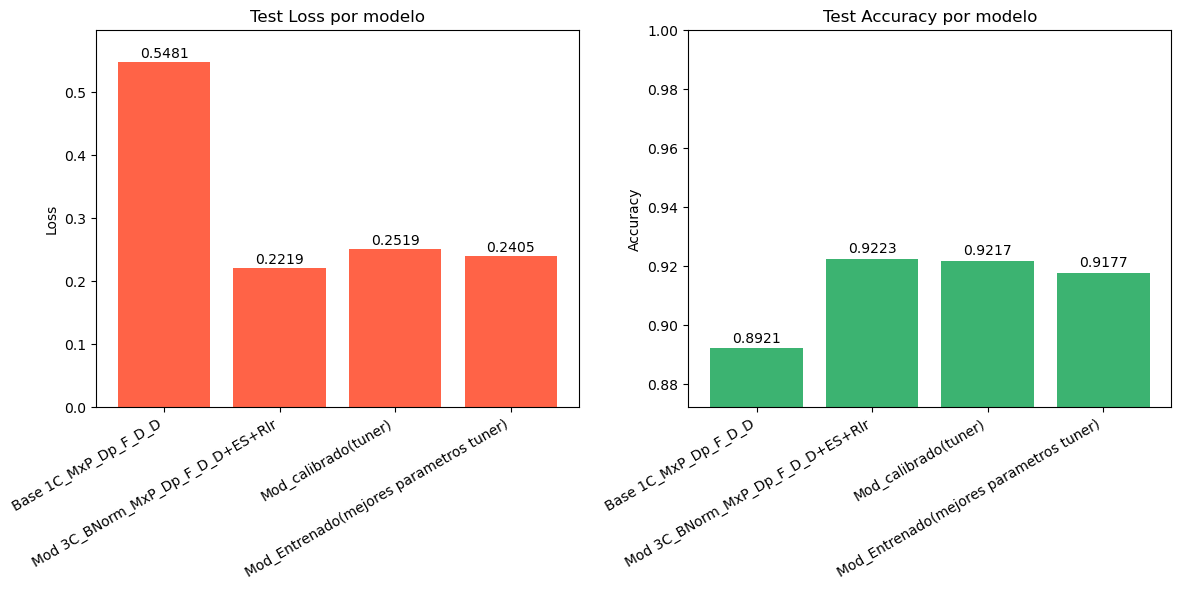

In [83]:
test_losses = [test_loss_fashion, test_loss_fashion1, test_loss_best_model, test_loss_fashion_model_t]
test_accuracies = [test_Accuracy_fashion, test_Accuracy_fashion1, test_Accuracy_best_model, test_Accuracy_fashion_model_t]

plt.figure(figsize=(12, 6))

# Gráfico de Loss
plt.subplot(1, 2, 1)
bars_loss = plt.bar(modelos, test_losses, color='tomato')
plt.title('Test Loss por modelo')
plt.ylabel('Loss')
plt.ylim(0, max(test_losses) + 0.05)
plt.xticks(rotation=30, ha='right')
for bar in bars_loss:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/ 2, height + 0.001, 
             f"{height:.4f}", ha='center', va='bottom')
    
# Gráfico de Accuracy
plt.subplot(1, 2, 2)
bars_acc=plt.bar(modelos, test_accuracies, color='mediumseagreen')
plt.title('Test Accuracy por modelo')
plt.ylabel('Accuracy')
plt.ylim(min(test_accuracies) - 0.02, 1.0)
plt.xticks(rotation=30, ha='right')

for bar in bars_acc:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001, 
             f"{height:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Se encontraron 9198 labels correctos


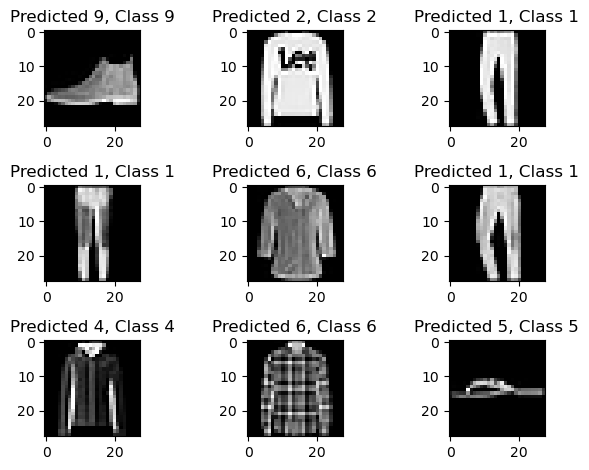

In [84]:
predicted_classes = fashion_model1.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes==y_test)[0]
test="Se encontraron %s labels correctos" % len(correct)
print(test) 
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

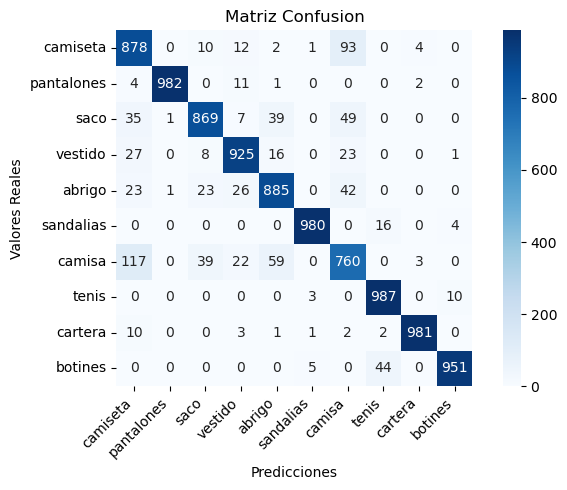

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
class_names = [
    'camiseta', 'pantalones', 'saco', 'vestido', 'abrigo',
    'sandalias', 'camisa', 'tenis', 'cartera', 'botines'
]
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.xticks(rotation=45, ha='right')

plt.title('Matriz Confusion')
plt.tight_layout()
plt.show()


##### Procedimiento Análisis y Conclusiones

Finalmente se calculan la pérdida y accuracy para los cuatro modelos obtenidos y se obtienen los siguientes resultados:

![alt text](image-4.png)

Como era de esperarse, el segundo modelo, que presentaba el comportamiento más estable y menor sobreajuste es el que mejor generaliza los resultados ante datos nuevos. <br>

Lo que concluimos hasta el momento en el desarrollo del curso, es que el conocimiento de lo que ha funcionado en otros casos es importante, con tantos parámetros involucrados en la calibración de las redes neuronales, a nosotros nos ha resultado tanto en el proyecto de la competencia, como en este taller un ejercicio un poco futil. 

Respecto a los resultados que se observan en la matriz de confusión, is interesante, aunque no sorprendente,  notar como las confusiones se presentan con las camisas, ya que estas se pueden confundir facilmente con otros "tops" como camisetas, abrigos, sacos y hasta vestidos. De modo contrario donde menos se presentan equivocaciones son con los tenis (3 veces sandalias y 10 botines) y los pantalones. 